# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import shutil
import os
from operator import add
from collections import Counter

# Reading Data

In [ ]:
train_data = pd.read_csv("Data/train.csv", index_col = False)

In [ ]:
# Reading the whole data using networkx
train_graph = nx.read_edgelist("Data/train.csv", delimiter = ',', nodetype = int, comments = 's', create_using = nx.DiGraph())

# Followers & Following of Each User

Now, After we have finished analysing each user **followers** and **following**, incoming edges and outcoming edges or the indegree of each node in (graph language) and the outdegree,not it's time to merge the two values we have of each node to get more comprehensive view on each node,and i will apply the same method we have done in the first two parts.

In [ ]:
indegree_dist = list(dict(train_graph.in_degree()).values())
outdegree_dist = list(dict(train_graph.out_degree()).values())

In [ ]:
in_out_degree_dist = list(map(add, indegree_dist, outdegree_dist))
in_out_degree_dist.sort()

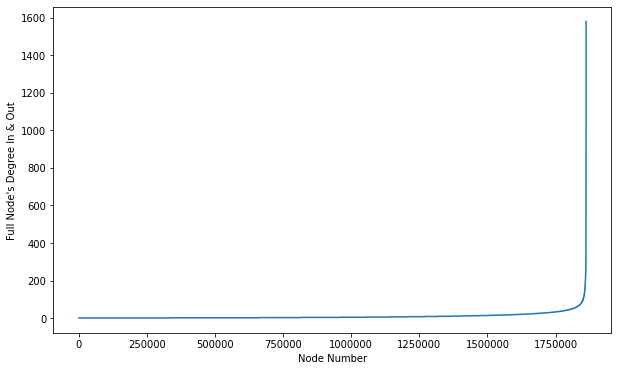

In [ ]:
plt.figure(figsize = (10, 6))
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.plot(in_out_degree_dist)
plt.xlabel("Node Number")
plt.ylabel("Full Node's Degree In & Out")
plt.show()

The shape of this plot is excactly as the previous one, a very few number of users with a lot of following and the rest of users gather togeather in the left and that expectable because most of users follow only the people they know and some celebrites sometimes.

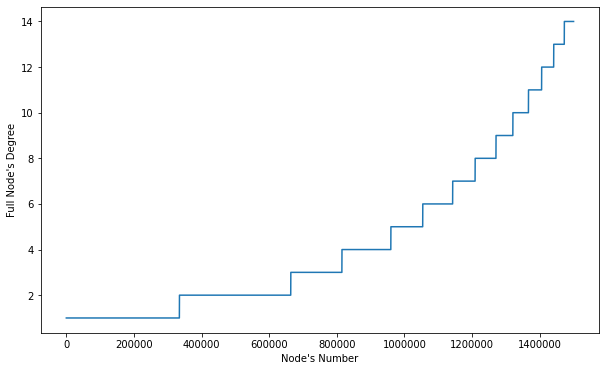

In [ ]:
plt.figure(figsize = (10, 6))
# Taking the first 1,500,000 and focusing on it
plt.plot(in_out_degree_dist[:1500000])
plt.ticklabel_format(style = "plain", axis = 'x', useOffset = False)
plt.xlabel("Node's Number")
plt.ylabel("Full Node's Degree")
plt.show()

When combining the two degrees togeather the result plot is more jagged than the previos two plots which mean that there is more varianec here in term of degrees rather than in degree and out degree alone.

In [ ]:
print("Min number of following for a node =", np.min(in_out_degree_dist))
print("Max number of following for a node =", np.max(in_out_degree_dist))

Min number of following for a node = 1
Max number of following for a node = 1579


So There is no degree which is not activea al all, no nodes disconnected from the graph and that is obvious because it would not be here but we need to know how many nodes with just degree equal to one.

In [ ]:
cnt, number_of_nodes = 0, train_graph.number_of_nodes()
for i in in_out_degree_dist:
  if i == 1:
    cnt += 1

print("Number of nodes with one followers / following =", cnt)
print("Percentage of nodes with one followers / following =", (cnt / number_of_nodes) * 100, '%')

Number of nodes with one followers / following = 334291
Percentage of nodes with one followers / following = 17.951208772325504 %


About 18% of nodes have only one link connected to it either in or out and this number if relativley large, now we are goona calculate most frequent degree number and return the top 10 values.

In [ ]:
cnt = Counter(in_out_degree_dist)
for key, value in cnt.most_common(10):
  print(f"Degree {key} repeated {value} times in graph with percentage =", (value / number_of_nodes) * 100, '%')

Degree 1 repeated 334291 times in graph with percentage = 17.951208772325504 %
Degree 2 repeated 329273 times in graph with percentage = 17.681745443610314 %
Degree 3 repeated 151273 times in graph with percentage = 8.123261483605589 %
Degree 4 repeated 144683 times in graph with percentage = 7.769382779693054 %
Degree 5 repeated 94279 times in graph with percentage = 5.062720838569019 %
Degree 6 repeated 88499 times in graph with percentage = 4.752338606609316 %
Degree 7 repeated 66413 times in graph with percentage = 3.566334804695471 %
Degree 8 repeated 61704 times in graph with percentage = 3.313464574540065 %
Degree 9 repeated 49911 times in graph with percentage = 2.6801881625157074 %
Degree 10 repeated 46111 times in graph with percentage = 2.4761306397740332 %


Most of nodes are not really active and tend to have really small number of connections and only a few number of nodes tend to form more connections like we saw in the previous analysis.

In [ ]:
print("The average of in / out degree distribution =", np.mean(in_out_degree_dist))
print("The median of in / out degree distribution =", np.median(in_out_degree_dist))
print("The standard deviation of in / out degree distribution =", np.std(in_out_degree_dist))

The average of in / out degree distribution = 10.135772357723578
The median of in / out degree distribution = 4.0
The standard deviation of in / out degree distribution = 18.294002792411355


In [ ]:
for i in range(0, 110, 10):
  print(f"The {i}th percentile value of in / out degree distribution =", np.percentile(in_out_degree_dist, i))

The 0th percentile value of in / out degree distribution = 1.0
The 10th percentile value of in / out degree distribution = 1.0
The 20th percentile value of in / out degree distribution = 2.0
The 30th percentile value of in / out degree distribution = 2.0
The 40th percentile value of in / out degree distribution = 3.0
The 50th percentile value of in / out degree distribution = 4.0
The 60th percentile value of in / out degree distribution = 6.0
The 70th percentile value of in / out degree distribution = 9.0
The 80th percentile value of in / out degree distribution = 14.0
The 90th percentile value of in / out degree distribution = 24.0
The 100th percentile value of in / out degree distribution = 1579.0


60% of the users have 6 connections / links, 70% of them have 9 links coming in / out or less, Most of the values tend to follow / get followed by small number of users, which give us some thought of users in this graph tend not to make connections with others people easily and hence making new links may not be very probabe **(That might give intution of predicting negative class would be more probable and that why we need Precision / Recall metrics here)** and For that if we focus on the right part of the followers starting from 90th and larger to get more insight and how full degree of right part of our nodes is.

In [ ]:
for i in range(90, 101, 1):
  print(f"The {i}th percentile =", np.percentile(in_out_degree_dist, i))

The 90th percentile = 24.0
The 91th percentile = 26.0
The 92th percentile = 28.0
The 93th percentile = 31.0
The 94th percentile = 33.0
The 95th percentile = 37.0
The 96th percentile = 41.0
The 97th percentile = 48.0
The 98th percentile = 58.0
The 99th percentile = 79.0
The 100th percentile = 1579.0


In [ ]:
for i in range(0, 110, 10):
  j = 99 + (i / 100)
  print(f"The {j}th percentile =", np.percentile(in_out_degree_dist, j))

The 99.0th percentile = 79.0
The 99.1th percentile = 83.0
The 99.2th percentile = 87.0
The 99.3th percentile = 93.0
The 99.4th percentile = 99.0
The 99.5th percentile = 108.0
The 99.6th percentile = 120.0
The 99.7th percentile = 138.0
The 99.8th percentile = 168.0
The 99.9th percentile = 221.0
The 100.0th percentile = 1579.0


The value at 100th percentile could be an outlier due to the large gap between it and the other nodes in term of following / followers degree.

In [ ]:
Q1, Q3 = np.percentile(in_out_degree_dist, 25), np.percentile(in_out_degree_dist, 75)
IQR = Q3 - Q1
print("Inter Quantile Range =", IQR)

Inter Quantile Range = 9.0


In [ ]:
low_limit, high_limit = -1.5 * Q1, +1.5 * Q3
print("The low limit of the observation to be consider as outliers =", int(low_limit))
print("The high limit of the observation to be consider as outliers =", int(high_limit))

The low limit of the observation to be consider as outliers = -3
The high limit of the observation to be consider as outliers = 16


So each value below our low limit would be considered as outlier but here this is not possible due to the fact that the low limit is negative hence no user has negative number of followers + followed and that's obvious because the data is clearley skewed to the right, and each value grater than our high limit in this case 16 would be considered as outliers.

In [ ]:
cnt = 0
for i in in_out_degree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 312178
Percentage of values over the upper limit = 16.763755088013234 %


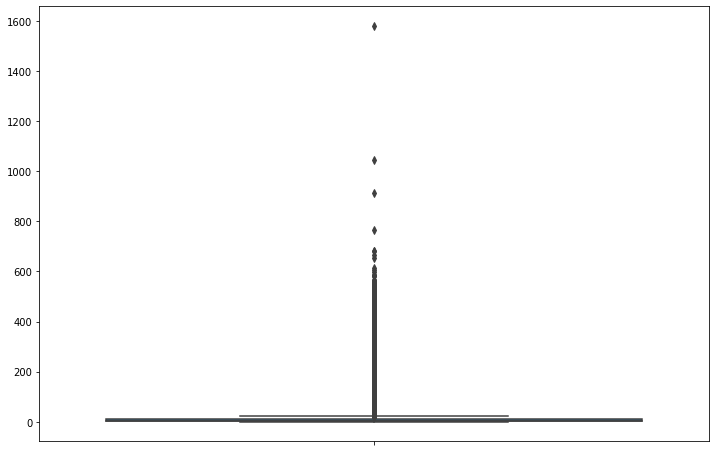

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = in_out_degree_dist)
plt.show()

In [ ]:
# increasing the threshold from 1.5 to 3
# I will discard low limit as it will be negative anyway
high_limit = +3 * Q3
print("The high limit of the observation to be consider as outliers =", high_limit)

The high limit of the observation to be consider as outliers = 33.0


In [ ]:
cnt = 0
for i in in_out_degree_dist:
  if i > high_limit:
    cnt += 1

print("Number of values over the upper limit =", cnt)
print("Percentage of values over the upper limit =", (cnt / 1862220) * 100, '%')

Number of values over the upper limit = 110854
Percentage of values over the upper limit = 5.952787533159348 %


This is more resonable and acceptable results as only 6% of the data could be outliers (not neccessary) rather than having 16.7% as outliers which is large percentage.

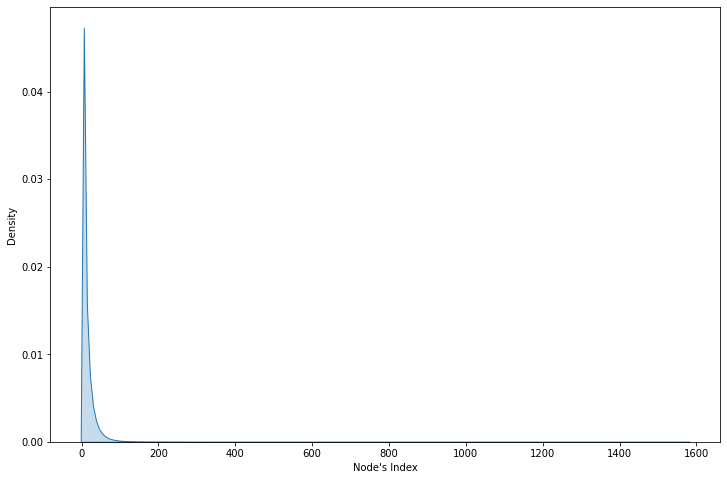

In [ ]:
plt.figure(figsize = (12, 8))
sns.kdeplot(in_out_degree_dist, fill = True)
plt.xlabel("Node's Index")
plt.show()